In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/travel-system/Final_Updated_Expanded_Users.csv
/kaggle/input/travel-system/Expanded_Destinations.csv
/kaggle/input/travel-system/Final_Updated_Expanded_Reviews.csv
/kaggle/input/travel-system/Final_Updated_Expanded_UserHistory.csv


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
destination_df=pd.read_csv("/kaggle/input/travel-system/Expanded_Destinations.csv")
reviews_df=pd.read_csv("/kaggle/input/travel-system/Final_Updated_Expanded_Reviews.csv")
userhistory_df=pd.read_csv("/kaggle/input/travel-system/Final_Updated_Expanded_UserHistory.csv")
users_df=pd.read_csv("/kaggle/input/travel-system/Final_Updated_Expanded_Users.csv")

merge data set

In [4]:
reviews_destinations=pd.merge(reviews_df,destination_df,on='DestinationID',how='inner')
reviews_destinations

,ReviewID,DestinationID,UserID,Rating,ReviewText,Name,State,Type,Popularity,BestTimeToVisit
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb
2,3,927,12,2,A historical wonder,Goa Beaches,Goa,Beach,7.741214,Nov-Mar
3,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar
4,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar
...,...,...,...,...,...,...,...,...,...,...
994,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb
995,996,140,140,3,A historical wonder,Leh Ladakh,Jammu and Kashmir,Adventure,8.907808,Apr-Jun
996,997,823,858,5,Incredible monument!,Jaipur City,Rajasthan,City,8.501225,Oct-Mar
997,998,279,839,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,7.841207,Sep-Mar


In [5]:
reviews_destination_userhistory=pd.merge(reviews_destinations,userhistory_df,on='UserID',how='inner')

In [6]:
df=pd.merge(reviews_destination_userhistory,users_df,on='UserID',how='inner')
df


,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [7]:
df.shape

(993, 20)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

ReviewID            0
DestinationID_x     0
UserID              0
Rating              0
ReviewText          0
Name_x              0
State               0
Type                0
Popularity          0
BestTimeToVisit     0
HistoryID           0
DestinationID_y     0
VisitDate           0
ExperienceRating    0
Name_y              0
Email               0
Preferences         0
Gender              0
NumberOfAdults      0
NumberOfChildren    0
dtype: int64

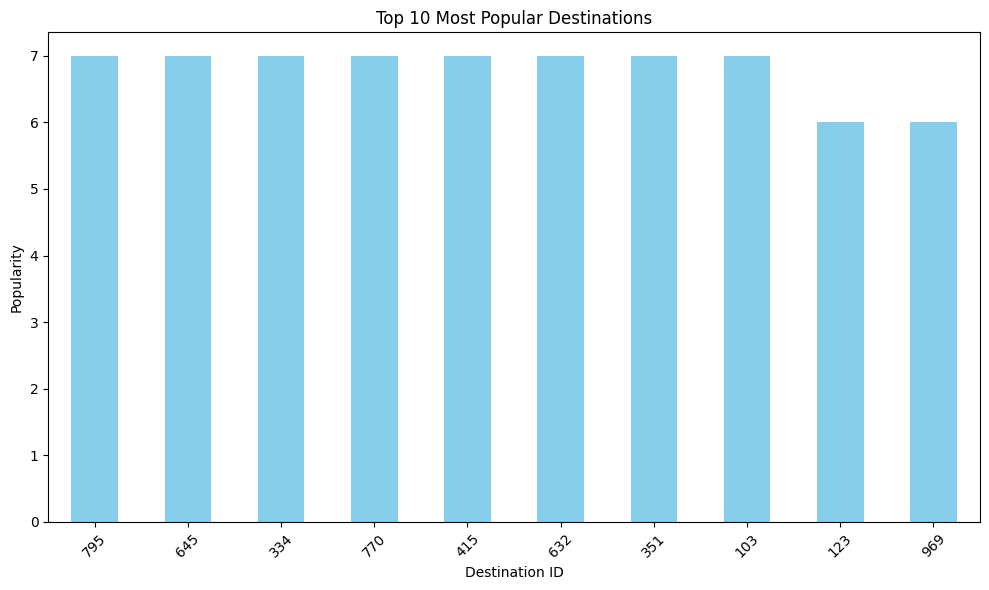

In [10]:
import matplotlib.pyplot as plt

# Get top 10 destinations by count
top_destinations = df['DestinationID_x'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_destinations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Destinations')
plt.xlabel('Destination ID')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


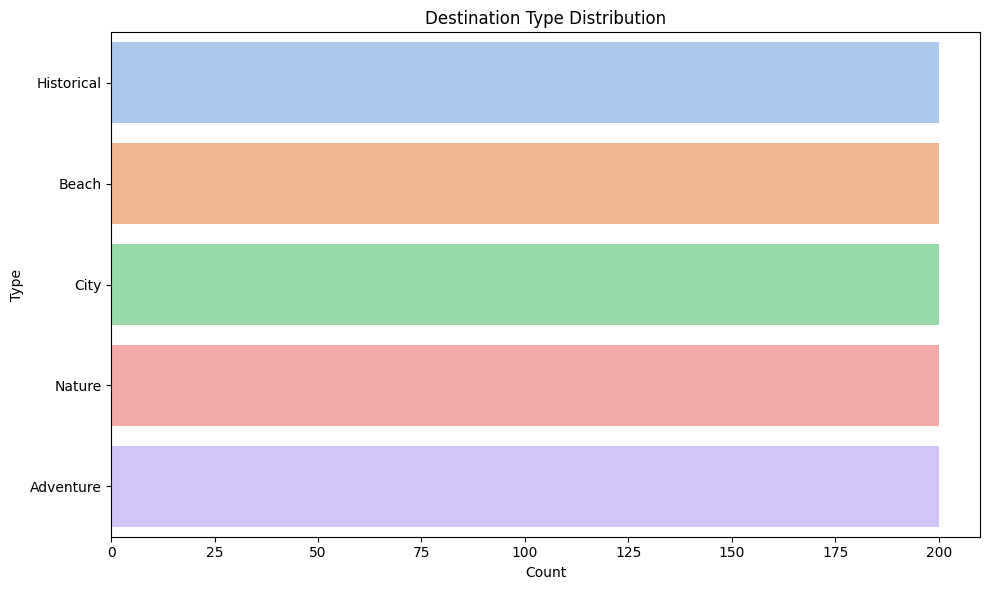

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='Type',
    data=destination_df,
    order=destination_df['Type'].value_counts().index,
    palette='pastel'
)
plt.title('Destination Type Distribution')
plt.xlabel('Count')
plt.ylabel('Type')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


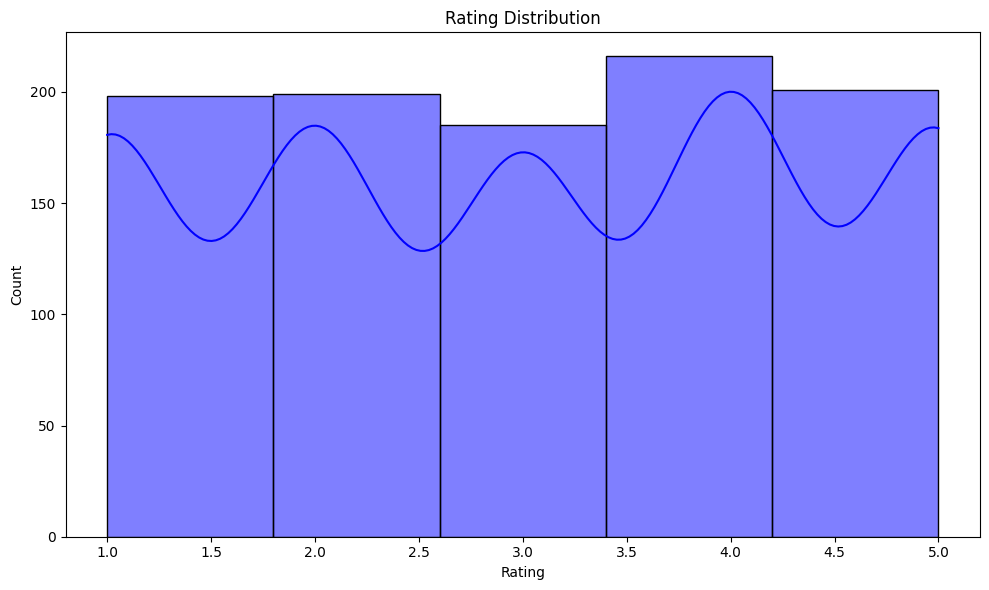

In [12]:
#rating distributuion
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['Rating'], bins=5, kde=True, color='blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.tight_layout()
plt.show()


In [13]:
df


,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [14]:
df['features']=df['Type']+" "+df['State']+" "+df['BestTimeToVisit']+" "+df['Preferences']

In [15]:
df['features']

0                City Rajasthan Oct-Mar City, Historical
1      Historical Uttar Pradesh Nov-Feb City, Historical
2               City Rajasthan Oct-Mar Nature, Adventure
3                Nature Kerala Sep-Mar Nature, Adventure
4                City Rajasthan Oct-Mar City, Historical
                             ...                        
988    Historical Uttar Pradesh Nov-Feb Beaches, Hist...
989    Historical Uttar Pradesh Nov-Feb Beaches, Hist...
990    Historical Uttar Pradesh Nov-Feb Beaches, Hist...
991    Historical Uttar Pradesh Nov-Feb Beaches, Hist...
992              City Rajasthan Oct-Mar City, Historical
Name: features, Length: 993, dtype: object

In [16]:
#we need to find Similarity
# 1. Create the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# 2. Fit and transform the 'features' column
destination_features = vectorizer.fit_transform(df['features'])

# 3. Convert to dense array if needed
destination_features.toarray()
destination_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6045 stored elements and shape (993, 20)>

In [17]:
cosine_sim=cosine_similarity(destination_features,destination_features)
cosine_sim

array([[1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ],
       [0.30209204, 1.        , 0.10568682, ..., 0.89329488, 0.89329488,
        0.30209204],
       [0.80314548, 0.10568682, 1.        , ..., 0.        , 0.        ,
        0.80314548],
       ...,
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ]])

In [18]:
# function will be called when new user will come as new user id
def recommend_destination(user_id, userhistory_df, destination_df, cosine_sim):
    """
    Recommends top 5 destinations for a given user based on similarity scores.
    
    Args:
    - user_id: ID of the user.
    - userhistory_df: User history DataFrame containing 'UserID' and 'DestinationID'.
    - destination_df: Destinations DataFrame containing destination details.
    - cosine_sim: Cosine similarity matrix for destinations.
    
    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # get the destinations the user has visited
    visited_destinations = userhistory_df[userhistory_df['UserID'] == user_id]['DestinationID'].values

    # calculate similarity score for visited destinations
    similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis=0)

    # recommend top 5 destinations
    recommended_destination_idx = np.argsort(similar_scores)[::-1]  # sort in descending order

    recommendations = []
    for idx in recommended_destination_idx:
        if destination_df.iloc[idx]['DestinationID'] not in visited_destinations:
            recommendations.append(
                destination_df.iloc[idx][['DestinationID', 'Name', 'State', 'Type', 'BestTimeToVisit']].to_dict()
            )
        if len(recommendations) >= 5:
            break

    return pd.DataFrame(recommendations)

# Example
recommend_destinations = recommend_destination(20, userhistory_df, destination_df, cosine_sim)
print(recommend_destinations)


   DestinationID               Name              State        Type  \
0             15         Leh Ladakh  Jammu and Kashmir   Adventure   
1            445         Leh Ladakh  Jammu and Kashmir   Adventure   
2            161          Taj Mahal      Uttar Pradesh  Historical   
3            160         Leh Ladakh  Jammu and Kashmir   Adventure   
4            544  Kerala Backwaters             Kerala      Nature   

  BestTimeToVisit  
0         Apr-Jun  
1         Apr-Jun  
2         Nov-Feb  
3         Apr-Jun  
4         Sep-Mar  


In [19]:
#Create a user-item matrix based on user history
user_item_matrix=userhistory_df.pivot(index='UserID',columns='DestinationID',values='ExperienceRating')
# missing values with O (indicating no rating/experience)
user_item_matrix.fillna(0,inplace=True)

#Compute cosine similarity between users
user_similarity=cosine_similarity(user_item_matrix)


In [20]:
import numpy as np
import pandas as pd

# NEW USER SIMILARITY WITH OTHER USERS
def collaborative_recommend(user_id, user_similarity, user_item_matrix, destination_df):
    """
    Recommends destinations based on collaborative filtering.

    Args:
    - user_id: ID of the user for whom recommendations are to be made.
    - user_similarity: Cosine similarity matrix for users.
    - user_item_matrix: User-item interaction matrix (e.g., ratings or preferences).
    - destination_df: DataFrame containing destination details.

    Returns:
    - DataFrame with recommended destinations and their details.
    """

    # Find similar users
    similar_users = user_similarity[user_id - 1]  # user_id assumed to be 1-indexed

    # Get indices of top 5 similar users (excluding self)
    similar_user_idx = np.argsort(similar_users)[::-1][1:6]

    # Average ratings across these similar users
    similar_user_rating = user_item_matrix.iloc[similar_user_idx].mean(axis=0)

    # Get top 5 destination IDs based on highest average rating
    recommended_destination_ids = similar_user_rating.sort_values(ascending=False).head(5).index

    # Return recommended destination details
    recommendations = destination_df[destination_df['DestinationID'].isin(recommended_destination_ids)][
        ['DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit']
    ]

    return recommendations


In [21]:
#Example: Collaborative recommendations for user 1
collaborative_recomendations=collaborative_recommend(11, user_similarity,user_item_matrix, destination_df)
# Display recommendations
collaborative_recomendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
367,368,Jaipur City,Rajasthan,City,8.008252,Oct-Mar
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun
969,970,Leh Ladakh,Jammu and Kashmir,Adventure,9.013101,Apr-Jun


**USER INPUT FEATURE BASE RECOMMENDATION**

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load and preprocess the data
data = df.copy()  # Assuming 'df' is your existing DataFrame


In [23]:
#thse all are text we have to encode it using label encoder
features=['Name_x','State','Type','BestTimeToVisit','Preferences','Gender','NumberOfAdults','NumberOfChildren']
target='Popularity'
data[features]

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Female,1,1
1,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"City, Historical",Male,1,1
2,Jaipur City,Rajasthan,City,Oct-Mar,"Nature, Adventure",Male,1,1
3,Kerala Backwaters,Kerala,Nature,Sep-Mar,"Nature, Adventure",Female,2,0
4,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...
988,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
989,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
990,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2
991,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2


In [37]:
#encoding 
label_encoders={}
#if i had only one column i can use it direct but here i have multiple columns i have to use for loop

for col in features:
    if data[col].dtype=='object':
        le=LabelEncoder()
        data[col]=le.fit_transform(data[col])
        label_encoders[col]=le

data[features]

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,3,2,3,1,0,1,1
1,4,4,3,1,1,1,1,1
2,1,3,2,3,2,1,1,1
3,2,2,4,4,2,0,2,0
4,1,3,2,3,1,1,2,0
...,...,...,...,...,...,...,...,...
988,4,4,3,1,0,1,2,0
989,4,4,3,1,0,1,2,0
990,4,4,3,1,0,1,2,2
991,4,4,3,1,0,1,2,2


In [27]:
X=data[features]
y=data[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
#train model
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 0.30215968785605185


In [31]:
import pandas as pd

def recommend_destinations(user_input, model, label_encoders, features, data):
    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            # Encode categorical values using the label encoder
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            # Use numeric values directly
            encoded_input[feature] = user_input[feature]
    
    # Convert dictionary to DataFrame
    input_df = pd.DataFrame([encoded_input])

    # Predict popularity or recommendation
    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity

user_input = {
    'Name_x': 'Jaipur City',
    'Type': 'City',
    'State': 'Rajasthan',
    'BestTimeToVisit': 'Oct-Mar',
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1
}
predicted_popularity = recommend_destinations(
    user_input=user_input,
    model=model,
    label_encoders=label_encoders,
    features=features,
    data=data
)

print("Predicted Popularity:", predicted_popularity)


Predicted Popularity: 7.876797518379621


In [32]:
import pickle
pickle.dump(model,open("model.pkl",'wb'))
pickle.dump(label_encoders,open("label_encoders.pkl",'wb'))

In [33]:
!ls -l /kaggle/working/


total 2076
-rw-r--r-- 1 root root     858 Jul 20 11:27 label_encoders.pkl
-rw-r--r-- 1 root root 2121044 Jul 20 11:27 model.pkl


In [34]:
import os
print(os.getcwd())  # Should return: /kaggle/working


/kaggle/working
